In [ ]:
model = nn.SpatialConvolution(nInputPlane, nOutputPlane, kW, kH, [dw], [dH], [padW], [padH])

owidth = floor((width + 2*padW - kW) / dW - 1)
oheight = floor((height + 2*padH - kH) / dH + 1)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# assume some unit gaussian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10
nonlinearities = ['relu']*len(hidden_layer_sizes)

In [24]:
act = {'relu' : lambda x : np.maximum(0, x), 'tanh' : lambda x : np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i - 1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    # W = np.random.randn(fan_in, fan_out) * 0.01 # layer initialization
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) # Xavier initialization

    H = np.dot(X, W) # matrix multiply
    H = act[nonlinearities[i]](H) # nonlinearity
    Hs[i] = H # cache result on this layer

input layer had mean 0.000522 and std 1.001333
hidden layer 1 had mean 0.566138 and std 0.827630
hidden layer 2 had mean 0.559551 and std 0.829308
hidden layer 3 had mean 0.533769 and std 0.805720
hidden layer 4 had mean 0.546912 and std 0.794960
hidden layer 5 had mean 0.523726 and std 0.801642
hidden layer 6 had mean 0.516898 and std 0.739826
hidden layer 7 had mean 0.494471 and std 0.749555
hidden layer 8 had mean 0.503959 and std 0.775114
hidden layer 9 had mean 0.538109 and std 0.772800
hidden layer 10 had mean 0.467379 and std 0.721136


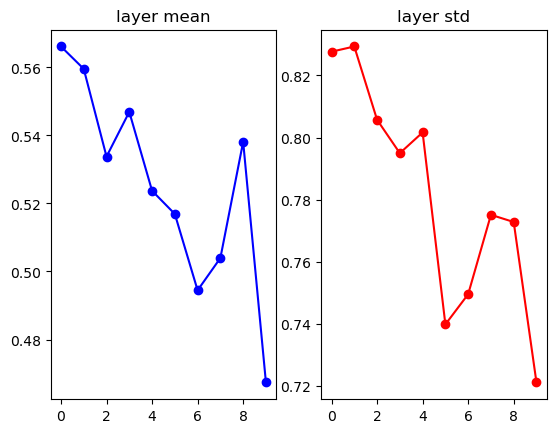

<Figure size 640x480 with 0 Axes>

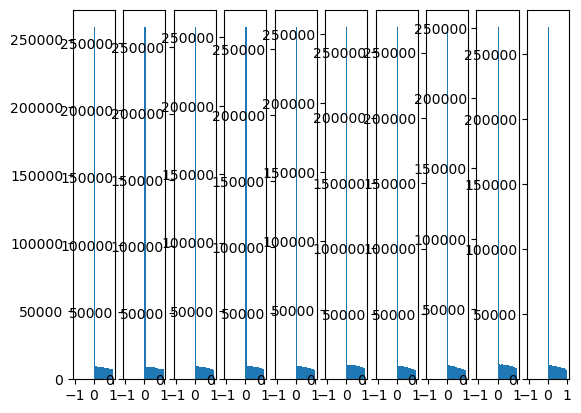

In [25]:
# look at distributions at each layer
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i + 1, layer_means[i], layer_stds[i]))

# plot the means and standard derivations
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

# plot the raw districutions
plt.figure()
plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))